# TP 4

Integrantes: Augusto Rabbia, Manuel Spreutels

IIA 2024

## Paquetes y funciones

In [ ]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import fetch_olivetti_faces
from sklearn import tree

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Nos será útil a lo largo del TP
def promedio(lista):
	return sum(lista)/len(lista)

e1

In [ ]:
def espirales(n):
	angles = np.random.uniform(0, 2*np.pi, n)
	radii = np.sqrt(np.random.uniform(0, 1, n))

	# Convert to Cartesian coordinates
	x_coords = radii * np.cos(angles)
	y_coords = radii * np.sin(angles)

	# Generar n/2 puntos para cada clase
	n_half = n // 2

	# Etiquetas para cada clase
	clases = []

	for i in range(n):
		theta = angles[i]
		ro = radii[i]
		if (theta / (4 * np.pi)) <= ro <= ((theta + np.pi) / (4 * np.pi)):
			clases.append(1)
		elif ((2*np.pi+theta) / (4 * np.pi)) <= ro <= ((theta + 3*np.pi) / (4 * np.pi)):
			clases.append(1)
		elif ((-2*np.pi+theta) / (4 * np.pi)) <= ro <= ((theta - np.pi) / (4 * np.pi)):
			clases.append(1)
		else: clases.append(0)

	return ((x_coords, y_coords), clases)

e1-3

In [ ]:
#función que entrena una red ya definida previamente "evaluaciones" veces, cada vez entrenando un número de épocas elegido al crear la red y midiendo el error en train, validación y test al terminar ese paso de entrenamiento.
#Guarda y devuelve la red en el paso de evaluación que da el mínimo error de validación
#entradas: la red, las veces que evalua, los datos de entrenamiento y sus respuestas, de validacion y sus respuestas, de test y sus respuestas
#salidas: la red entrenada en el mínimo de validación, los errores de train, validación y test medidos en cada evaluación
def entrenar_red_clasif(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    best_red = None
    best_error_val = np.inf
    error_train = []
    error_val = []
    error_test = []

    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        errval = sk.metrics.zero_one_loss(red.predict(X_val), y_val)
        error_val.append(errval)
        error_train.append(sk.metrics.zero_one_loss(red.predict(X_train), y_train))
        error_test.append(sk.metrics.zero_one_loss(red.predict(X_test), y_test))

        if errval < best_error_val:
            best_error_val = errval
            best_red = deepcopy(red)

    return best_red, error_train, error_val, error_test

In [ ]:
def graficarRes(y_pred, X_test, title = None):
    x_clase_0 = []
    y_clase_0 = []
    x_clase_1 = []
    y_clase_1 = []
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            x_clase_0.append(X_test.iloc[i]["x"])
            y_clase_0.append(X_test.iloc[i]["y"])
        else:
            x_clase_1.append(X_test.iloc[i]["x"])
            y_clase_1.append(X_test.iloc[i]["y"])

    plt.scatter(x_clase_0, y_clase_0, color='red')
    plt.scatter(x_clase_1, y_clase_1, color='blue')
    plt.title(title)
    plt.grid(True)
    plt.show()

In [ ]:
#función que entrena una red ya definida previamente "evaluaciones" veces, cada vez entrenando un número de épocas elegido al crear la red y midiendo el error en train, validación y test al terminar ese paso de entrenamiento.
#Guarda y devuelve la red en el paso de evaluación que da el mínimo error de validación
#entradas: la red, las veces que evalua, los datos de entrenamiento y sus respuestas, de validacion y sus respuestas, de test y sus respuestas
#salidas: la red entrenada en el mínimo de validación, los errores de train, validación y test medidos en cada evaluación
def entrenar_red_reg(red, evaluaciones, X_train, y_train, X_val, y_val, X_test, y_test):
    best_red = None
    best_error_val = np.inf
    error_train = []
    error_val = []
    error_test = []
    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        errval = sk.metrics.mean_squared_error(red.predict(X_val), y_val)
        error_val.append(errval)
        error_train.append(sk.metrics.mean_squared_error(red.predict(X_train), y_train))
        error_test.append(sk.metrics.mean_squared_error(red.predict(X_test), y_test))

        if errval < best_error_val:
            best_error_val = errval
            best_red = deepcopy(red)
    return best_red, error_train, error_val, error_test

e4

In [ ]:
#función que entrena una red ya definida previamente "evaluaciones" veces, cada vez entrenando un número de épocas elegido al crear la red y midiendo el error en train, validación y test al terminar ese paso de entrenamiento.
#Guarda y devuelve la red en el paso de evaluación que da el mínimo error de validación
#entradas: la red, las veces que evalua, los datos de entrenamiento y sus respuestas, de validacion y sus respuestas, de test y sus respuestas
#salidas: la red entrenada en el mínimo de validación, los errores de train y test medidos en cada evaluación
def entrenar_red_reg_por_penalizacion(red, evaluaciones, X_train, y_train, X_test, y_test):
    best_red = None
    error_train = []
    pesos = []
    error_test = []
    for i in range(evaluaciones):
        red.fit(X_train, y_train)
        weights = red.coefs_
        pesos.append(np.sum([np.sum(np.square(w)) for w in weights]))

        error_train.append(sk.metrics.mean_squared_error(red.predict(X_train), y_train))
        error_test.append(sk.metrics.mean_squared_error(red.predict(X_test), y_test))

    return pesos, error_train, error_test

e5

In [ ]:
def metricas_no_graph(dfs, clases, dfsresultados, columnaresultados, dftest, clasestest):
	# dfs resultados = (errores_entrenamiento, errores_test, numnodos)

	errs_test = []
	errs_train = []
	nnodes = []
	for i in range(20):
		# Creando árbol de decisión
		clf = DecisionTreeClassifier(criterion="entropy",min_impurity_decrease=0.002,random_state=0,min_samples_leaf=5)
		clf.fit(dfs[i], clases)

		# Prediciendo sobre el conjunto de test y de entrenamiento
		y_pred_test = clf.predict(dftest)
		y_pred_train = clf.predict(dfs[i])

		# Guardando resultados
		errs_test.append(1-accuracy_score(clasestest, y_pred_test))
		errs_train.append(1-accuracy_score(clases, y_pred_train))
		nnodes.append(clf.tree_.node_count)

	dfsresultados[0][columnaresultados] = errs_train
	dfsresultados[1][columnaresultados] = errs_test
	dfsresultados[2][columnaresultados] = nnodes

In [ ]:
def diagonales(n, d, C):
	# Verificar que n sea par para poder dividir los datos equitativamente entre las dos clases
	if n % 2 != 0:
		raise ValueError("n debe ser un número par")

	# Parámetros para la clase 1
	mean1 = np.ones(d)
	cov_matrix = np.eye(d) * (C * np.sqrt(d)) ** 2

	# Parámetros para la clase 0
	mean0 = -np.ones(d)

	# Generar n/2 puntos para cada clase
	datos_clase_1 = np.random.multivariate_normal(mean1, cov_matrix, n//2)
	datos_clase_0 = np.random.multivariate_normal(mean0, cov_matrix, n//2)

	# Concatenar los datos y las etiquetas
	datos = np.vstack((datos_clase_1, datos_clase_0))

	return datos

In [ ]:
def paralelas(n, d, C):
    # Verificar que n sea par para poder dividir los datos equitativamente entre las dos clases
    if n % 2 != 0:
        raise ValueError("n debe ser un número par")

    # Parámetros para la clase 1
    mean1 = np.zeros(d)
    mean1[0] = 1  # Centro en (1, 0, 0, ..., 0)
    cov_Matrix = np.diag([C*C] * d)  # Matriz de covarianza diagonal con desviación estándar C

    # Parámetros para la clase 0
    mean0 = np.zeros(d)
    mean0[0] = -1  # Centro en (-1, 0, 0, ..., 0)

    # Generar n/2 puntos para cada clase
    n_half = n // 2
    datos_clase_1 = np.random.multivariate_normal(mean1, cov_Matrix, n_half)
    datos_clase_0 = np.random.multivariate_normal(mean0, cov_Matrix, n_half)

    # Etiquetas para cada clase
    etiquetas_clase_1 = np.ones(n_half)
    etiquetas_clase_0 = np.zeros(n_half)

    # Concatenar los datos y las etiquetas
    datos = np.vstack((datos_clase_1, datos_clase_0))

    return datos

In [ ]:
def crear_conjs_diag(n, d, C, cant):
	clases = np.concatenate((np.array([1 for _ in range(n//2)]), np.array([0 for _ in range(n//2)])))

	dfs = []
	for i in range(cant):
		coords = diagonales(n,d,C)
		dic = dict()
		for dim in range(d):
			dic[dim] = [x[dim] for x in coords]
		dfs.append(pd.DataFrame(dic))
	return (dfs, clases)

In [ ]:
def crear_conjs_paralelas(n, d, C, cant):
	clases = np.concatenate((np.array([1 for _ in range(n//2)]), np.array([0 for _ in range(n//2)])))

	dfs = []
	for i in range(cant):
		coords = paralelas(n,d,C)
		dic = dict()
		for dim in range(d):
			dic[dim] = [x[dim] for x in coords]
		dfs.append(pd.DataFrame(dic))
	return (dfs, clases)

## Ejercicio 1

Importamos la función de espirales anidadas y creamos los datasets

In [ ]:
#Generar conjuntos de entrenamiento
(coords, clase2) = espirales(600)
dfAjuste = pd.DataFrame({"x":coords[0], "y":coords[1]})
# Conjunto de test
(coordsTest, y_test) = espirales(2000)
X_test = pd.DataFrame({"x":coordsTest[0], "y":coordsTest[1]})

Creamos modelo de clasificación

In [ ]:
#defino parámetros de la red
epocas_por_entrenamiento=20    #numero de epocas que entrena cada vez
eta=0.1              #learning rate
alfa=0.9              #momentum
N2=[2,10,20,40]       #neuronas en la capa oculta

clasif1 = MLPClassifier(hidden_layer_sizes=(N2[0],), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
clasif2 = MLPClassifier(hidden_layer_sizes=(N2[1],), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
clasif3 = MLPClassifier(hidden_layer_sizes=(N2[2],), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
clasif4 = MLPClassifier(hidden_layer_sizes=(N2[3],), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)

Función de entrenamiento

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(dfAjuste, clase2, test_size=0.2, random_state=0)

best_clasif2, e_train2, e_val2, e_test2 = entrenar_red_clasif(clasif1, 1000, X_train, y_train, X_val, y_val, X_test, y_test)
best_clasif10, e_train10, e_val10, e_test10 = entrenar_red_clasif(clasif2, 1000, X_train, y_train, X_val, y_val, X_test, y_test)
best_clasif20, e_train20, e_val20, e_test20 = entrenar_red_clasif(clasif3, 1000, X_train, y_train, X_val, y_val, X_test, y_test)
best_clasif40, e_train40, e_val40, e_test40 = entrenar_red_clasif(clasif4, 1000, X_train, y_train, X_val, y_val, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


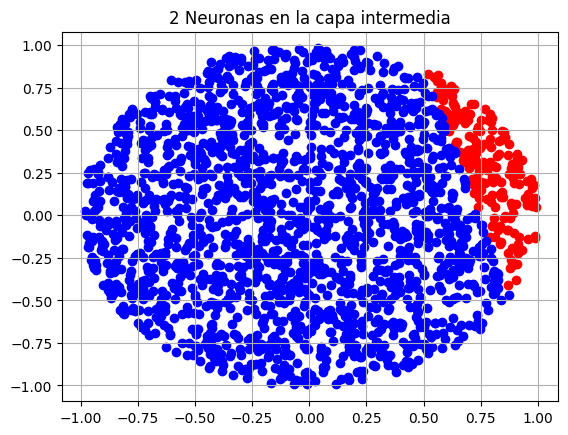

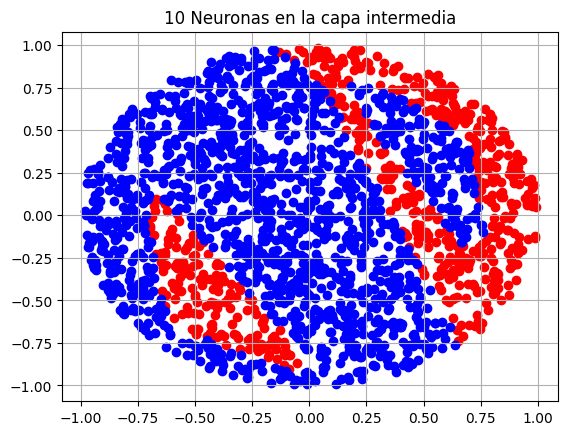

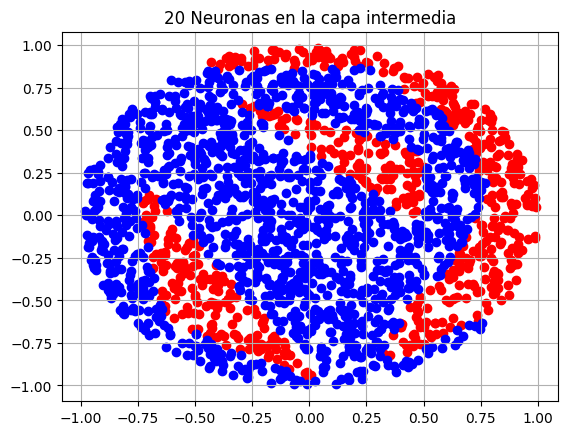

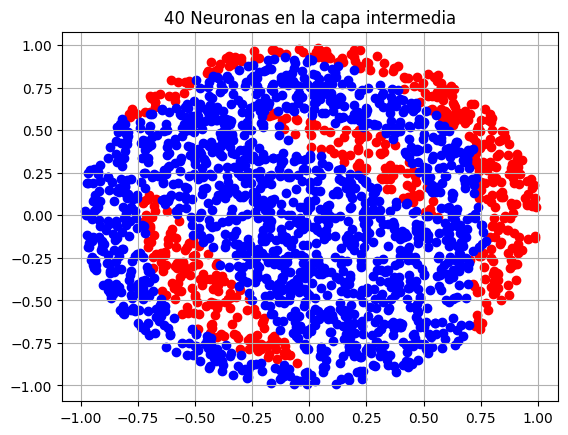

In [ ]:
y_test_clasif2 = best_clasif2.predict(X_test)
y_test_clasif10 = best_clasif10.predict(X_test)
y_test_clasif20 = best_clasif20.predict(X_test)
y_test_clasif40 = best_clasif40.predict(X_test)

graficarRes(y_test_clasif2, X_test, "2 Neuronas en la capa intermedia")
graficarRes(y_test_clasif10, X_test, "10 Neuronas en la capa intermedia")
graficarRes(y_test_clasif20, X_test, "20 Neuronas en la capa intermedia")
graficarRes(y_test_clasif40, X_test, "40 Neuronas en la capa intermedia")

In [ ]:
sum(y_val)

66

Notamos que las clases están perfectamente balanceadas en el conjunto de validación. Sin embargo, en todos los casos, la mejor red tiene mayor tendencia a predecir la clase 1.

Sin embargo, este fenómeno se atenúa a medida que aumenta la complejidad de la red: apenas se comienza a ver una forma medianamente elíptica llegando a las 20 neuronas.

Esto se debe a que, en la capa intermedia, cada neurona representa una combinación de las características de la capa de entrada. Por lo tanto, aumentar la cantidad de neuronas permite considerar una mayor cantidad de combinaciones, permitienedo tener una clasificación más precisa. Por ejemplo, cuando se tienen dos neuronas, la capa de salida, que consiste en una única neurona, toma sus decisiones en base a sólo dos números, con sus respectivos pesos, mientras que, cuando se tienen 40, la decisión tomada considera una mayor cantidad de valores, es más informada.

Sin embargo, se puede igualmente observar diminishing returns respecto de la cantidad de neuronas: la diferencia entre utilizar 2 y 10 neuronas resulta mucho más acentuada que la diferencia entre 20 y 40, a pesar de que en el primer caso hayan sólamente 8 neuronas más contra las 20 de este último.

## Ejercicio 2

Importamos los datasets

In [ ]:
dfElipses = pd.read_csv("dos_elipses.data", header=None)
dfElipses_test = pd.read_csv("dos_elipses.test", header=None)
dfElipses.columns = ["x", "y", "clase"]
dfElipses_test.columns = ["x", "y", "clase"]
dfElipses = dfElipses[:500]
dfElipses_test = dfElipses_test[:2000]

In [ ]:
#defino parámetros de la red
epocas_por_entrenamiento=50    #numero de epocas que entrena cada vez
N2=6       #neuronas en la capa oculta
learning_rates = [0.001, 0.01, 0.1]
momentums = [0.0, 0.5, 0.9]

redes = [[[],[],[]] for _ in range(10)]
for i in range(10):
  for j in range(3):     # learning_rates
      for k in range(3): # Momentums
          redes[i][j].append(MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=learning_rates[j],momentum=momentums[k],nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento))

In [ ]:
dfResults = pd.DataFrame(columns = learning_rates) # Sus filas corresponderan a cada momentum

X_train, X_val, y_train, y_val = train_test_split(dfElipses[["x","y"]], dfElipses["clase"], test_size=0.2, random_state=0)

for moms in range(3):
    avg = []
    for lrs in range(3):
        averages = []
        for i in range(10): # Hacemos 10 entrenamientos iguales
            _, e_train, e_val, e_test = entrenar_red_clasif(redes[i][lrs][moms], 300, X_train, y_train, X_val, y_val, dfElipses_test[["x","y"]], dfElipses_test["clase"])
            averages.append(promedio(e_test))
        avg.append(promedio(averages))
    dfResults.loc[moms] = avg

dfResults.loc[moms] = avg

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

In [ ]:
dfResults.index = momentums
dfResults

,0.001,0.010,0.100
0.0,0.2435,0.243423,0.162436
0.5,0.2435,0.227863,0.163619
0.9,0.2435,0.151418,0.143810


Vemos que los parámetros que nos dan el mejor modelo son learning rate = 0.1 y momentum = 0.9

In [ ]:
lr = 0.1
mom = 0.9

epochs = [4, 8, 16, 32, 64, 128, 256, 512]
dfEpochs = pd.DataFrame(columns = epochs)

avg_train = []
avg_val = []
avg_test = []

for e in epochs:
    mejor_red = MLPClassifier(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=lr, momentum=mom,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
    _, e_train, e_val, e_test = entrenar_red_clasif(mejor_red, 300, X_train, y_train, X_val, y_val, dfElipses_test[["x","y"]], dfElipses_test["clase"])
    avg_test.append(promedio(e_test))
    avg_val.append(promedio(e_val))
    avg_train.append(promedio(e_train))

dfEpochs.loc[0] = avg_train
dfEpochs.loc[1] = avg_val
dfEpochs.loc[2] = avg_test


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

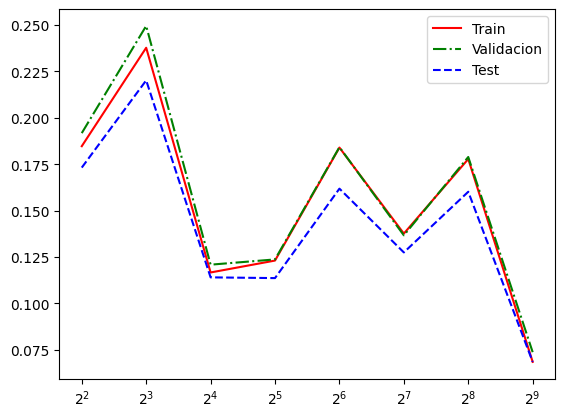

In [ ]:
# Entrenamiento
plt.plot(dfEpochs.loc[0], color="red")
# Validacion
plt.plot(dfEpochs.loc[1], color="green", linestyle="-.")
# Test
plt.plot(dfEpochs.loc[2], color="blue", linestyle="--")

plt.xscale('log', base = 2)
plt.legend(["Train", "Validacion", "Test"])
plt.show()

Para el mejor modelo que obtuvimos, podemos observar que su precisión se maximiza para $2^9$.

Interesantemente, se puede observar que la función obtenida no es monótona. En cambio, el error alcanza mínimos locales para $2^2$, $2^4$ y $2^7$ épocas (con los valores que testeamos), y baja de manera ruidosa.

Esto resulta de gran interés, pues demuestra que un mismo modelo puede tener un performance que varía según las épocas, pero de manera poco predecible. Es decir, no bastará con encontrar un mínimo local para la cantidad de las épocas para saber que nuestro modelo tiene la cantidad óptima de épocas.

## Ejercicio 3

Importamos los datasets

In [ ]:
dfIkeda = pd.read_csv("ikeda.data", header=None, sep="\s+")
dfIkeda_test = pd.read_csv("ikeda.test", header=None, sep="\s+")
dfIkeda.columns = ["x1", "x2", "x3", "x4", "x5",  "y"]
dfIkeda_test.columns = ["x1", "x2", "x3", "x4", "x5",  "y"]
dfIkeda_test = dfIkeda_test[:2000]
dfIkeda.head(5)

,x1,x2,x3,x4,x5,y
0,0.907938,0.580088,0.165603,0.701732,0.354170,0.976418
1,0.580088,0.165603,0.701732,0.354170,0.976418,0.464438
2,0.165603,0.701732,0.354170,0.976418,0.464438,0.462873
3,0.701732,0.354170,0.976418,0.464438,0.462873,0.447031
4,0.354170,0.976418,0.464438,0.462873,0.447031,1.023614


Creamos el modelo

In [ ]:
#defino parámetros de la red
epocas_por_entrenamiento=50    #numero de epocas que entrena cada vez
eta=0.01              #learning rate
alfa=0.9               #momentum
N2=30                 #neuronas en la capa oculta

#defino MLP para regresión
regr = MLPRegressor(hidden_layer_sizes=(N2,), activation='logistic', solver='sgd', alpha=0.0, batch_size=1, learning_rate='constant', learning_rate_init=eta,momentum=alfa,nesterovs_momentum=False,tol=0.0,warm_start=True,max_iter=epocas_por_entrenamiento)
regr2 = deepcopy(regr)

### 95-5

In [ ]:
# 5% para validar
X_train, X_val, y_train, y_val = train_test_split(dfIkeda[["x1","x2","x3","x4","x5",]], dfIkeda["y"], test_size=0.05, random_state=0)

red1, e_train1, e_val1, e_test1 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red2, e_train2, e_val2, e_test2 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red3, e_train3, e_val3, e_test3 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red4, e_train4, e_val4, e_test4 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


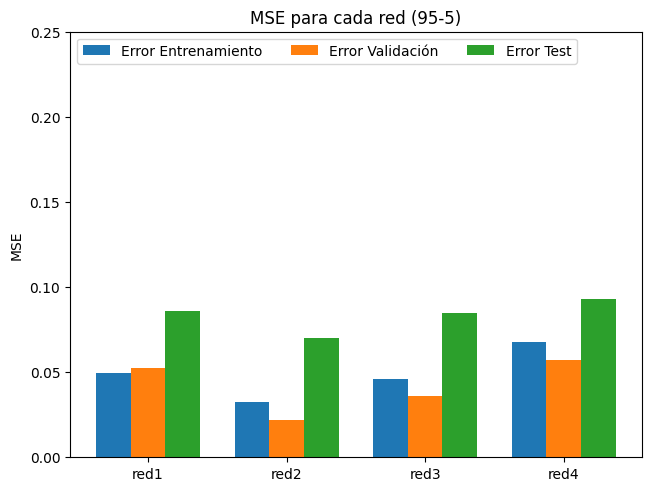

In [ ]:
redes = ("red1", "red2", "red3", "red4")
mse = {
    'Error Entrenamiento': (e_train1[-1], e_train2[-1], e_train3[-1], e_train4[-1]),
    'Error Validación': (e_val1[-1], e_val2[-1], e_val3[-1], e_val4[-1]),
    'Error Test': (e_test1[-1], e_test2[-1], e_test3[-1], e_test4[-1]),
}
x = np.arange(len(redes))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mse.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('MSE')
ax.set_title('MSE para cada red (95-5)')
ax.set_xticks(x + width, redes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.25)

plt.show()

En todos los casos, vemos que el error de validación nos da sustancialmente menor al de entrenamiento y test.

Como regla, tomaremos la red con menor error en el conjunto de test. En este caso, la red 2.

In [ ]:
mejor_95_5 = (red2, e_train2, e_val2, e_test2)

### 75-25

In [ ]:
# 25% para validar
X_train, X_val, y_train, y_val = train_test_split(dfIkeda[["x1","x2","x3","x4","x5",]], dfIkeda["y"], test_size=0.25, random_state=0)

regr = deepcopy(regr2)
red1, e_train1, e_val1, e_test1 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red2, e_train2, e_val2, e_test2 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red3, e_train3, e_val3, e_test3 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red4, e_train4, e_val4, e_test4 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


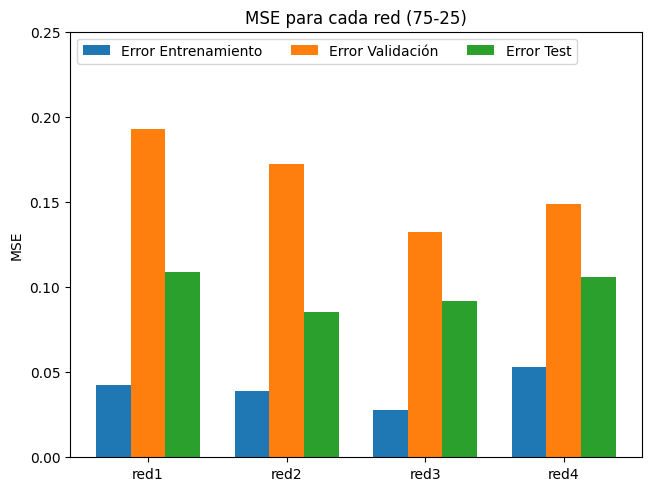

In [ ]:
redes = ("red1", "red2", "red3", "red4")
mse = {
    'Error Entrenamiento': (e_train1[-1], e_train2[-1], e_train3[-1], e_train4[-1]),
    'Error Validación': (e_val1[-1], e_val2[-1], e_val3[-1], e_val4[-1]),
    'Error Test': (e_test1[-1], e_test2[-1], e_test3[-1], e_test4[-1]),
}

x = np.arange(len(redes))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mse.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('MSE')
ax.set_title('MSE para cada red (75-25)')
ax.set_xticks(x + width, redes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.25)

plt.show()

En este caso, elegimos la red 2.

In [ ]:
mejor_75_25 = (red2, e_train2, e_val2, e_test2)

### 50-50

In [ ]:
# 50% para validar
X_train, X_val, y_train, y_val = train_test_split(dfIkeda[["x1","x2","x3","x4","x5",]], dfIkeda["y"], test_size=0.5, random_state=0)

regr = deepcopy(regr2)
red1, e_train1, e_val1, e_test1 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red2, e_train2, e_val2, e_test2 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red3, e_train3, e_val3, e_test3 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])
regr = deepcopy(regr2)
red4, e_train4, e_val4, e_test4 = entrenar_red_reg(regr, 400, X_train, y_train, X_val, y_val, dfIkeda_test[["x1","x2","x3","x4","x5",]], dfIkeda_test["y"])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


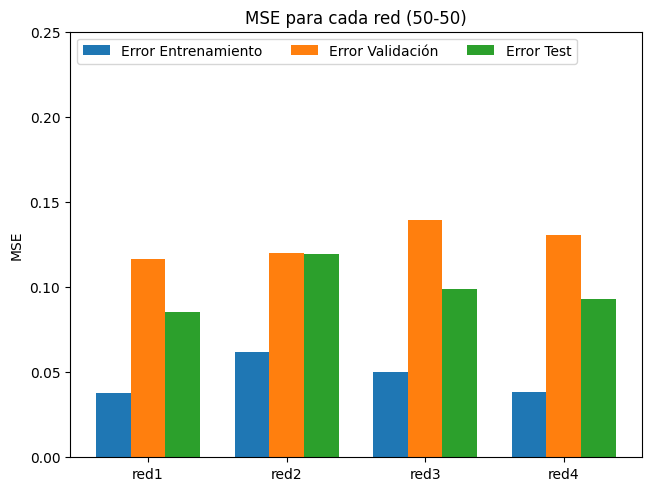

In [ ]:
redes = ("red1", "red2", "red3", "red4")
mse = {
    'Error Entrenamiento': (e_train1[-1], e_train2[-1], e_train3[-1], e_train4[-1]),
    'Error Validación': (e_val1[-1], e_val2[-1], e_val3[-1], e_val4[-1]),
    'Error Test': (e_test1[-1], e_test2[-1], e_test3[-1], e_test4[-1]),
}

x = np.arange(len(redes))
width = 0.25
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in mse.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

ax.set_ylabel('MSE')
ax.set_title('MSE para cada red (50-50)')
ax.set_xticks(x + width, redes)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 0.25)

plt.show()

Elegimos la red 1.

In [ ]:
mejor_50_50 = (red1, e_train1, e_val1, e_test1)

### Graficando los resultados de las redes "adecuadas"

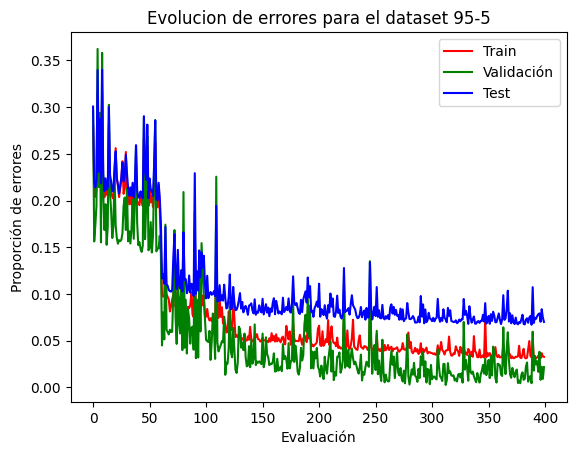

In [ ]:
plt.plot(mejor_95_5[1], color="red")
plt.plot(mejor_95_5[2], color="green")
plt.plot(mejor_95_5[3], color="blue")

plt.legend(["Train", "Validación", "Test"])
plt.title("Evolucion de errores para el dataset 95-5")
plt.xlabel("Evaluación")
plt.ylabel("Proporción de errores")
plt.show()

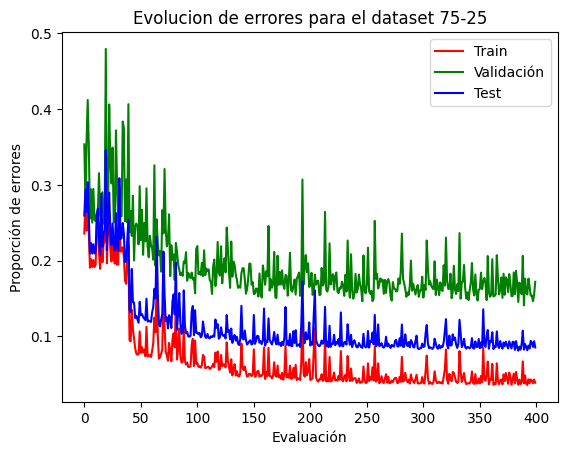

In [ ]:
plt.plot(mejor_75_25[1], color="red")
plt.plot(mejor_75_25[2], color="green")
plt.plot(mejor_75_25[3], color="blue")

plt.legend(["Train", "Validación", "Test"])
plt.title("Evolucion de errores para el dataset 75-25")
plt.xlabel("Evaluación")
plt.ylabel("Proporción de errores")
plt.show()

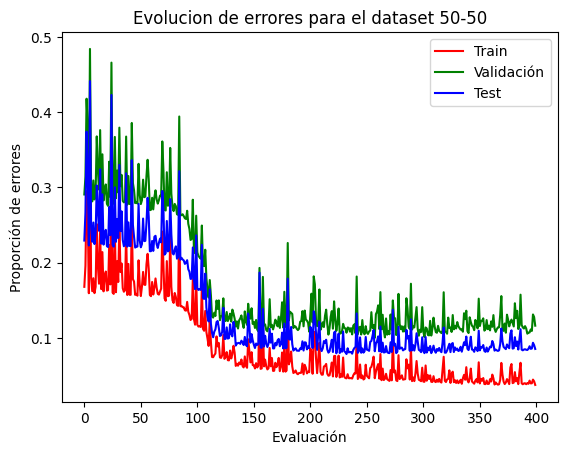

In [ ]:
plt.plot(mejor_50_50[1], color="red")
plt.plot(mejor_50_50[2], color="green")
plt.plot(mejor_50_50[3], color="blue")

plt.legend(["Train", "Validación", "Test"])
plt.title("Evolucion de errores para el dataset 50-50")
plt.xlabel("Evaluación")
plt.ylabel("Proporción de errores")
plt.show()

Observamos que, al tener un conjunto de validación muy pequeño, el error de la validación resulta mucho menor al valor del test. Esto indica que nuestro modelo, durante su entrenamiento, dio métricas que, luego de ser testeado, no pudo convalidar.

Por otro lado, nos resulta extraño que el caso 50-50 de métricas tan buenas, pues es el modelo que menor cantidad de datos recibió para su entrenamiento. Sin embargo, se puede observar que este modelo necesitó de 100 evaluaciones para empezar a obtener errores razonables, mientras que el modelo 75-25 y 95-5 lo hicieron sólo en 50.

Por estos dos motivos, es posible concluir que el modelo 75-25 se encuentra en un balance entre tener modelos que actúan de forma esperable por el conjunto de validación y que son rápidamente ajustables. Utilizar un buen ratio de datos de validación, que sea relativamente pequeño, pero tolerante al ruido, nos permite aprovechar al máximo los datos disponibles.

## Ejercicio 4

Importamos los datos

In [ ]:
dfSsp = pd.read_csv("ssp.data", header=None)
dfSsp_test = pd.read_csv("ssp.test", header=None)
dfSsp.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "y"]
dfSsp_test.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "y"]
dfSsp.head(5)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,y
0,0.025,0.055,0.080,0.115,0.180,0.290,0.145,0.100,0.050,0.040,0.015,0.000,0.000
1,0.180,0.290,0.145,0.100,0.050,0.040,0.015,0.000,0.000,0.010,0.055,0.135,0.235
2,0.290,0.145,0.100,0.050,0.040,0.015,0.000,0.000,0.010,0.055,0.135,0.235,0.315
3,0.145,0.100,0.050,0.040,0.015,0.000,0.000,0.010,0.055,0.135,0.235,0.315,0.300
4,0.050,0.040,0.015,0.000,0.000,0.010,0.055,0.135,0.235,0.315,0.300,0.195,0.140


In [ ]:
# Creando los modelos
redes = []
gammas = [0.000000001, 0.00000001, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
for i in range(10):
    redes.append(MLPRegressor(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=gammas[i], batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20))

results = pd.DataFrame(columns = gammas)
pesos = []
e_trains = []
e_tests = []
for i in range(10):
    (peso, e_train, e_test) = entrenar_red_reg_por_penalizacion(redes[i], 1000, \
                                  dfSsp[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12"]], \
                                  dfSsp["y"], \
                                  dfSsp_test[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12"]], \
                                  dfSsp_test["y"])
    pesos.append(promedio(peso))
    e_trains.append(promedio(e_train))
    e_tests.append(promedio(e_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

In [ ]:
results.loc[0] = pesos
results.loc[1] = e_trains
results.loc[2] = e_tests

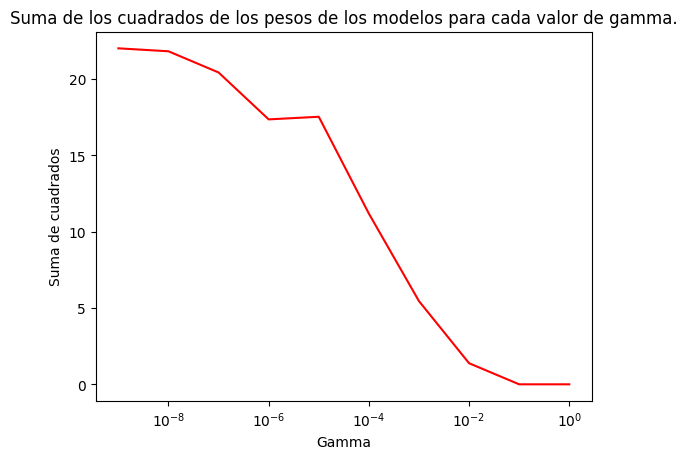

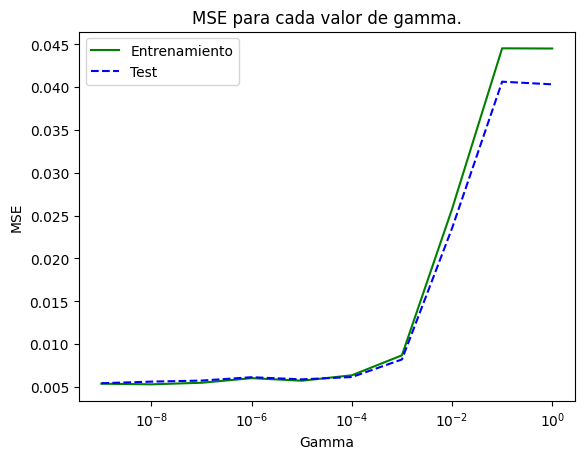

In [ ]:
# Pesos
plt.plot(results.loc[0], color="red")
plt.title("Suma de los cuadrados de los pesos de los modelos para cada valor de gamma.")
plt.xscale('log', base = 10)
plt.xlabel("Gamma")
plt.ylabel("Suma de cuadrados")
plt.show()
# Entrenamiento
plt.plot(results.loc[1], color="green", linestyle="-")
# Test
plt.plot(results.loc[2], color="blue", linestyle="--")

plt.xscale('log', base = 10)
plt.title("MSE para cada valor de gamma.")
plt.xlabel("Gamma")
plt.ylabel("MSE")
plt.legend(["Entrenamiento", "Test"])
plt.show()

Se observa que ambos tipos de errores crecen monótonamente y en curvas muy similares. Esto podría indicar que el modelo regularizado con un $\gamma = 10^{-9}$ ya de por sí no presenta overfitting, por lo que regularizar más allá de eso parece llevar a un modelo underfitteado.

Además, para $\gamma = 10^{-1}$ y $\gamma = 1$, los pesos ya valen prácticamente 0, y por lo tanto, los pesos para cualquier $\gamma >= 10^{-1}$ van a ser prácticamente nulos, por lo cual se trata de esencialmente el mismo modelo, llevando a que de un error casi constante.

Elegimos entonces $\gamma = 10^{-9}$ como nuestro mejor modelo y $\gamma = 10^{-1}$ para un modelo con underfitting, en vez de overfitting, y comparamos sus performances 10 veces.

In [ ]:
# gamma = 10^-9
red_best = MLPRegressor(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.000000001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)
# gamma = 10^-1
red_udf = MLPRegressor(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.1, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)

# Entrenamiento
(peso_best, e_train_best, e_test_best) = entrenar_red_reg_por_penalizacion(red_best, 100, \
                                  dfSsp[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12"]], \
                                  dfSsp["y"], \
                                  dfSsp_test[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12"]], \
                                  dfSsp_test["y"])

(peso_udf, e_train_udf, e_test_udf) = entrenar_red_reg_por_penalizacion(red_udf, 100, \
                                  dfSsp[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12"]], \
                                  dfSsp["y"], \
                                  dfSsp_test[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12"]], \
                                  dfSsp_test["y"])

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


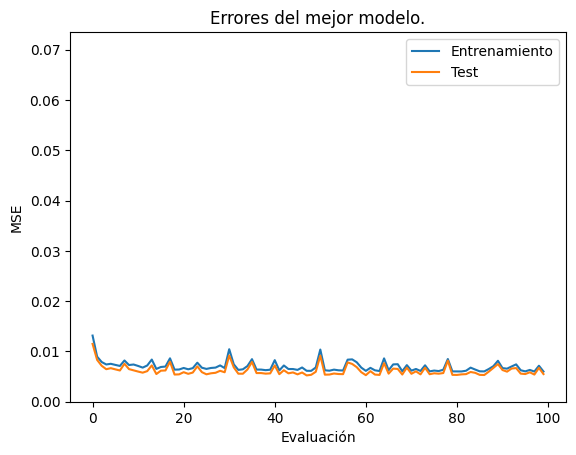

In [ ]:
plt.plot(range(100), e_train_best, label="Entrenamiento")
plt.plot(range(100), e_test_best, label="Test")
plt.title("Errores del mejor modelo.")
plt.legend()
plt.xlabel("Evaluación")
plt.ylabel("MSE")
plt.ylim(0, max(e_train_udf+e_test_udf)*1.05)
plt.show()

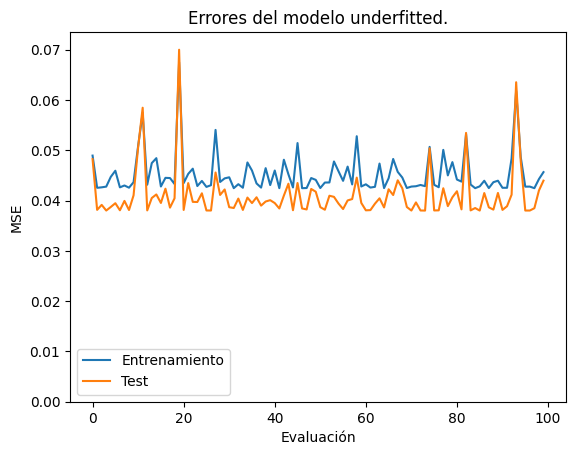

In [ ]:
plt.plot(range(100), e_train_udf, label="Entrenamiento")
plt.plot(range(100), e_test_udf, label="Test")
plt.title("Errores del modelo underfitted.")
plt.legend()
plt.xlabel("Evaluación")
plt.ylabel("MSE")
plt.ylim(0, max(e_train_udf+e_test_udf)*1.05)
plt.show()

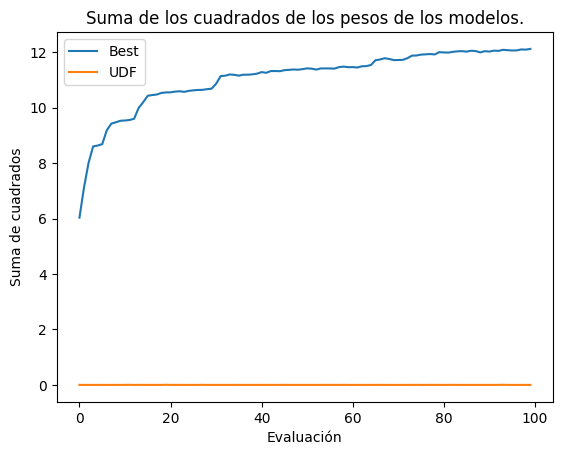

In [ ]:
plt.plot(range(100), peso_best, label="Best")
plt.plot(range(100), peso_udf, label="UDF")
plt.title("Suma de los cuadrados de los pesos de los modelos.")
plt.xlabel("Evaluación")
plt.ylabel("Suma de cuadrados")
plt.legend()
plt.show()

Como era de esperar, los pesos de los modelos underfitted son casi nulos. Esto se debe a que la función se minimiza más fácilmente bajando los pesos que el MSE al ser tan grande el gamma.

Mientras tanto, el mejor modelo aumenta sus pesos de forma consistente.



## Ejercicio 5

Creamos los datasets

In [ ]:
(dfs2Diag, clas2Diag) = crear_conjs_diag(250, 2, 0.78, 20)
(dfs4Diag, clas4Diag) = crear_conjs_diag(250, 4, 0.78, 20)
(dfs8Diag, clas8Diag) = crear_conjs_diag(250, 8, 0.78, 20)
(dfs16Diag, clas16Diag) = crear_conjs_diag(250, 16, 0.78, 20)
(dfs32Diag, clas32Diag) = crear_conjs_diag(250, 32, 0.78, 20)

(dftestL, clasT2Diag) = crear_conjs_diag(10000, 2, 0.78, 1)
dfT2Diag = dftestL[0]
(dftestL, clasT4Diag) = crear_conjs_diag(10000, 4, 0.78, 1)
dfT4Diag = dftestL[0]
(dftestL, clasT8Diag) = crear_conjs_diag(10000, 8, 0.78, 1)
dfT8Diag = dftestL[0]
(dftestL, clasT16Diag) = crear_conjs_diag(10000, 16, 0.78, 1)
dfT16Diag = dftestL[0]
(dftestL, clasT32Diag) = crear_conjs_diag(10000, 32, 0.78, 1)
dfT32Diag = dftestL[0]

In [ ]:
(dfs2Par, clas2Par) = crear_conjs_paralelas(250, 2, 0.78, 20)
(dfs4Par, clas4Par) = crear_conjs_paralelas(250, 4, 0.78, 20)
(dfs8Par, clas8Par) = crear_conjs_paralelas(250, 8, 0.78, 20)
(dfs16Par, clas16Par) = crear_conjs_paralelas(250, 16, 0.78, 20)
(dfs32Par, clas32Par) = crear_conjs_paralelas(250, 32, 0.78, 20)

(dftestL, clasT2Par) = crear_conjs_paralelas(10000, 2, 0.78, 1)
dfT2Par = dftestL[0]
(dftestL, clasT4Par) = crear_conjs_paralelas(10000, 4, 0.78, 1)
dfT4Par = dftestL[0]
(dftestL, clasT8Par) = crear_conjs_paralelas(10000, 8, 0.78, 1)
dfT8Par = dftestL[0]
(dftestL, clasT16Par) = crear_conjs_paralelas(10000, 16, 0.78, 1)
dfT16Par = dftestL[0]
(dftestL, clasT32Par) = crear_conjs_paralelas(10000, 32, 0.78, 1)
dfT32Par = dftestL[0]

In [ ]:
# Diccionarios con las métricas
errores_entrenamiento_diag = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
errores_test_diag = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
numnodos_diag = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})

# No utilizamos numnodos_diag, pero no queremos redefinir la función.
metricas_no_graph(dfs2Diag, clas2Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "2", dfT2Diag, clasT2Diag)
metricas_no_graph(dfs4Diag, clas4Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "4", dfT4Diag, clasT4Diag)
metricas_no_graph(dfs8Diag, clas8Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "8", dfT8Diag, clasT8Diag)
metricas_no_graph(dfs16Diag, clas16Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "16", dfT16Diag, clasT16Diag)
metricas_no_graph(dfs32Diag, clas32Diag, (errores_entrenamiento_diag, errores_test_diag, numnodos_diag), "32", dfT32Diag, clasT32Diag)

In [ ]:
errores_entrenamiento_paralelas = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
errores_test_paralelas = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
numnodos_paralelas = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
metricas_no_graph(dfs2Par, clas2Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "2", dfT2Par, clasT2Par)
metricas_no_graph(dfs4Par, clas4Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "4", dfT4Par, clasT4Par)
metricas_no_graph(dfs8Par, clas8Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "8", dfT8Par, clasT8Par)
metricas_no_graph(dfs16Par, clas16Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "16", dfT16Par, clasT16Par)
metricas_no_graph(dfs32Par, clas32Par, (errores_entrenamiento_paralelas, errores_test_paralelas, numnodos_paralelas), "32", dfT32Par, clasT32Par)

Creamos las redes y el lugar para almacenar los resultados de cada entrenamiento

In [ ]:
# Diccionarios con las métricas
metricas_diag_redes = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})

metricas_paralelas_redes = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})

red_diag2 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)

red_diag4 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)
red_diag8 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)
red_diag16 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)
red_diag32 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)

red_par2 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.0001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)
red_par4 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)
red_par8 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)
red_par16 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)
red_par32 = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', alpha=0.00001, batch_size=1, \
                 learning_rate='constant', learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                 tol=0.0,warm_start=True,max_iter=20)

In [ ]:
# Preparamos los conjuntos para entrenar las redes
redes_diag = [red_diag2, red_diag4, red_diag8, red_diag16, red_diag32]
redes_par = [red_par2, red_par4, red_par8, red_par16, red_par32]
dfs_diagonales = [dfs2Diag, dfs4Diag, dfs8Diag, dfs16Diag, dfs32Diag]
dfs_paralelas = [dfs2Par, dfs4Par, dfs8Par, dfs16Par, dfs32Par]
X_train_diagonales = [x[0] for x in dfs_diagonales]
X_train_paralelas = [x[0] for x in dfs_paralelas]
y_train_diagonales = [clas2Diag, clas4Diag, clas8Diag, clas16Diag, clas32Diag]
y_train_paralelas = [clas2Par, clas4Par, clas8Par, clas16Par, clas32Par]


X_tests_diagonales = [dfT2Diag, dfT4Diag, dfT8Diag, dfT16Diag, dfT32Diag]
X_tests_paralelas = [dfT2Par, dfT4Par, dfT8Par, dfT16Par, dfT32Par]
y_tests_diagonales = [clasT2Diag, clasT4Diag, clasT8Diag, clasT16Diag, clasT32Diag]
y_tests_paralelas = [clasT2Par, clasT4Par, clasT8Par, clasT16Par, clasT32Par]
pesos_diagonales = []
pesos_paralelas = []
e_trains_diag = []
e_tests_diag = []
e_trains_par = []
e_tests_par = []

In [ ]:
# Hacemos el entrenamiento para cada dimensionalidad
for i in range(5):
    (peso_diag, e_train_diag, e_test_diag) = entrenar_red_reg_por_penalizacion(redes_diag[i], 1000, \
                                  X_train_diagonales[i], \
                                  y_train_diagonales[i], \
                                  X_tests_diagonales[i], \
                                  y_tests_diagonales[i])
    pesos_diagonales.append(promedio(peso_diag))
    e_trains_diag.append(promedio(e_train_diag))
    e_tests_diag.append(promedio(e_test_diag))
    (peso_par, e_train_par, e_test_par) = entrenar_red_reg_por_penalizacion(redes_diag[i], 1000, \
                                  X_train_paralelas[i], \
                                  y_train_paralelas[i], \
                                  X_tests_paralelas[i], \
                                  y_tests_paralelas[i])
    pesos_paralelas.append(promedio(peso_par))
    e_trains_par.append(promedio(e_train_par))
    e_tests_par.append(promedio(e_test_par))



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Guardamos todos los resultados para comparar

In [ ]:

metricas_diag_redes.loc[0] = e_trains_diag # errores de entrenamiento
metricas_diag_redes.loc[1] = e_tests_diag # errores de test
metricas_diag_redes.loc[2] = pesos_diagonales # pesos

metricas_paralelas_redes.loc[0] = e_trains_par # errores de entrenamiento
metricas_paralelas_redes.loc[1] = e_tests_par # errores de test
metricas_paralelas_redes.loc[2] = pesos_paralelas # pesos

metricas_diag_arboles = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
metricas_diag_arboles.loc[0] = errores_entrenamiento_diag.mean().to_list()
metricas_diag_arboles.loc[1] = errores_test_diag.mean().to_list()
metricas_diag_arboles.loc[2] = numnodos_diag.mean().to_list()

metricas_par_arboles = pd.DataFrame({"2":[], "4":[], "8":[], "16":[], "32":[]})
metricas_par_arboles.loc[0] = errores_entrenamiento_paralelas.mean().to_list()
metricas_par_arboles.loc[1] = errores_test_paralelas.mean().to_list()
metricas_par_arboles.loc[2] = numnodos_paralelas.mean().to_list()

metricas_diag_redes.index = ["error_train", "error_test", "numnodos/pesos"]
metricas_paralelas_redes.index = ["error_train", "error_test", "numnodos/pesos"]
metricas_diag_arboles.index = ["error_train", "error_test", "numnodos/pesos"]
metricas_par_arboles.index = ["error_train", "error_test", "numnodos/pesos"]


In [ ]:
metricas_diag_redes.loc["error_train"]

2     0.109788
4     0.049288
8     0.003144
16    0.024856
32    0.022840
Name: error_train, dtype: float64

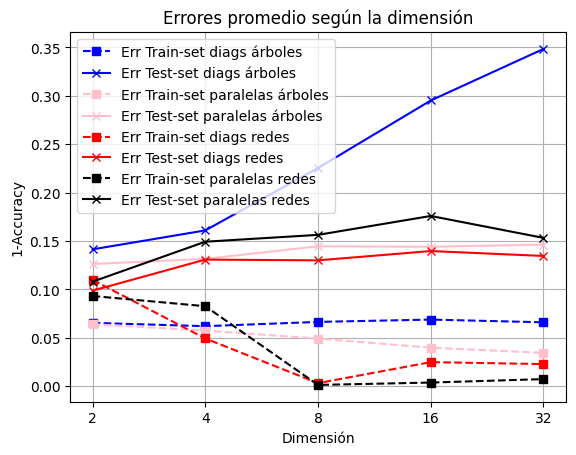

In [ ]:
# Plotteando diagonales

plt.plot(metricas_diag_arboles.loc["error_train"], color="blue", label="Err Train-set diags árboles", linestyle="--", marker="s")

plt.plot(metricas_diag_arboles.loc["error_test"], color="blue", label="Err Test-set diags árboles", marker="x")
# Plotteando paralelas
plt.plot(metricas_par_arboles.loc["error_train"], color="pink", label="Err Train-set paralelas árboles", linestyle="--", marker="s")

plt.plot(metricas_par_arboles.loc["error_test"], color="pink", label="Err Test-set paralelas árboles", marker="x")

plt.plot(metricas_diag_redes.loc["error_train"], color="red", label="Err Train-set diags redes", linestyle="--", marker="s")

plt.plot(metricas_diag_redes.loc["error_test"], color="red", label="Err Test-set diags redes", marker="x")

plt.plot(metricas_paralelas_redes.loc["error_train"], color="black", label="Err Train-set paralelas redes", linestyle="--", marker="s")

plt.plot(metricas_paralelas_redes.loc["error_test"], color="black", label="Err Test-set paralelas redes", marker="x")

plt.xlabel("Dimensión")
plt.ylabel("1-Accuracy")
plt.legend()
plt.title("Errores promedio según la dimensión")
plt.grid(True)
plt.show()

Luego de haber probado con varios valores de gamma, resultó que a partir de $\gamma = 10^{-4}$, el error de entrenamiento llegaba prácticamente a 0 a medida que aumentaban las dimensiones, lo cual nos daba un indicio de que el modelo estaba overfitteando.

Sin embargo, con mayores gammas, no encontramos una mejora sustancial en el performance sobre los conjuntos de test.

Por otro lado, se observa un performance ampliamente superior de las redes neuronales por sobre los árboles de decisión en el caso de los conjuntos diagonales, y especialmente a  mayor cantidad de dimensiones. Vemos que a medida que sube la cantidad de dimensiones, el árbol de decisión pierde precisión de manera más rápida que las redes, que parecen mantenerse relativamente estables.

Respecto a los conjuntos paralelos, el árbol parece resultar levemente más preciso, probablemente debido a la cantidad de datos es relativamente baja, y los árboles son especialmente buenos para conjuntos pequeños/ruidosos.

## Ejercicio 6

### Iris

Importamos los datasets

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

# Conjuntos entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=0)


Entrenamos y evaluamos la red

In [ ]:
red = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', \
                    alpha=0.0, batch_size=1, learning_rate='constant', \
                    learning_rate_init=0.1,momentum=0.3,nesterovs_momentum=False, \
                    tol=0.0,warm_start=True,max_iter=30)

_, e_train, e_val, e_test = entrenar_red_clasif(red, 300, X_train, y_train, X_val, y_val, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


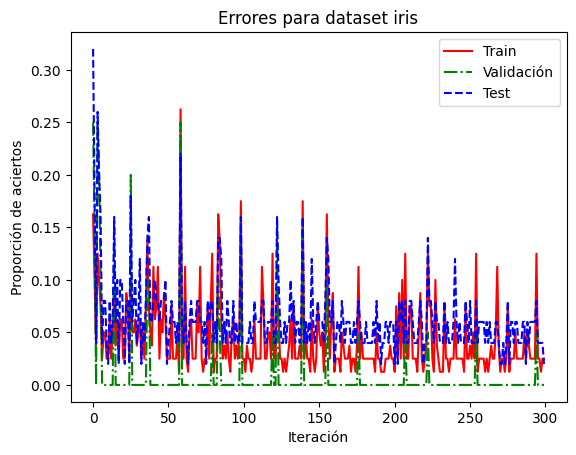

In [ ]:
# Entrenamiento
plt.plot(e_train, color="red")
# Validacion
plt.plot(e_val, color="green", linestyle="-.")
# Test
plt.plot(e_test, color="blue", linestyle="--")

plt.legend(["Train", "Validación", "Test"])
plt.title("Errores para dataset iris")
plt.xlabel("Evaluación")
plt.ylabel("Proporción de errores")
plt.show()

Se puede notar que existen varias evaluaciones donde todos los errores tienen un salto (visibles por los puntos donde el error de validación no es igual a 0), lo cual resulta intrigante.

Esto podría deberse a que, en diferentes entrenamientos, el modelo alcanza mínimos locales.

También resulta raro que el error de validación sea 0 para múltiples entrenamientos.

### Faces

Importamos el dataset

In [ ]:
dfFaces = pd.read_csv("faces.data", header=None)
dfFaces_test = pd.read_csv("faces.test", header=None)
X = dfFaces.iloc[:, :-1]
y = dfFaces.iloc[:, -1]

X_test = dfFaces_test.iloc[:, :-1]
y_test = dfFaces_test.iloc[:, -1]

# Conjuntos entrenamiento y test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

# Escalamos los datos
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Entrenamos y evaluamos la red

In [ ]:
red = MLPClassifier(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', \
                    alpha=0.0, batch_size=1, learning_rate='constant', \
                    learning_rate_init=0.1,momentum=0.3,nesterovs_momentum=False, \
                    tol=0.0,warm_start=True,max_iter=100)

_, e_train, e_val, e_test = entrenar_red_clasif(red, 1, X_train, y_train, X_val, y_val, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


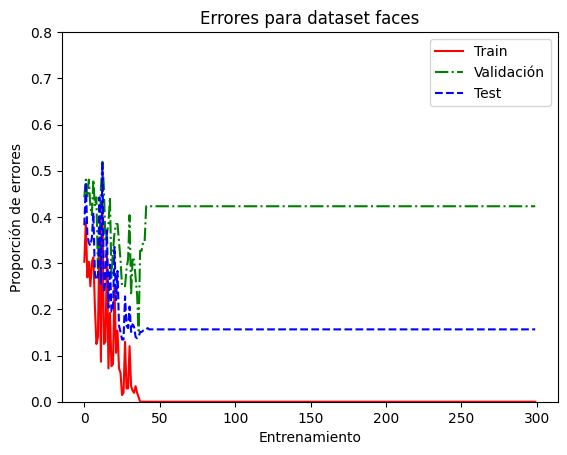

In [ ]:
# Entrenamiento
plt.plot(e_train, color="red")
# Validacion
plt.plot(e_val, color="green", linestyle="-.")
# Test
plt.plot(e_test, color="blue", linestyle="--")

plt.legend(["Train", "Validación", "Test"])
plt.title("Errores para dataset faces")
plt.xlabel("Entrenamiento")
plt.ylabel("Proporción de errores")
plt.ylim(0.0, 0.8)
plt.show()

Nos llama la atención que luego de al rededor de 40 evaluaciones, todos los errores se mantienen constantes. Esto se debe a que la red se overfittea, y, al llegar a un error de 0 sobre el conjunto de entrenamiento, es incapaz de mejorar su performance, pues el gradiente da 0. Para lograr un resultado mejor, podría ser útil aplicar regularización.

Nuestro modelo predice sobre el conjunto de test con una precisión de aproximadamente 85%, lo cual representa 5 puntos porcentuales menos que los resultados expuestos por Mitchell en su libro.

Cabe destacar que Mitchell utilizó 3 neuronas para la capa oculta a diferencia de nuestras 6, lo cual podría haber causado overfitting. Esta teoría se ve respaldada por el hecho que el error de entrenamiento da 0.

## Ejercicio 7

Importamos el dataset

In [ ]:
dfSsp = pd.read_csv("ssp.data", header=None)
dfSsp_test = pd.read_csv("ssp.test", header=None)
dfSsp.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "y"]
dfSsp_test.columns = ["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12", "y"]

X_train, X_val, y_train, y_val = train_test_split(dfSsp[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12"]], dfSsp["y"], test_size=0.2, random_state=0)

Utilizaremos batches de tamaños 1, 10% del dataset, 50 y 100

In [ ]:
batch_sizes = [1, 10, 40]
redes = []

for i in range(3):
  redes.append(MLPRegressor(hidden_layer_sizes=(6,), activation='logistic', solver='sgd', \
                             alpha=0.0, learning_rate='constant', \
                             learning_rate_init=0.05,momentum=0.3,nesterovs_momentum=False, \
                             tol=0.0,warm_start=True,max_iter=200,
                             batch_size = batch_sizes[i])) # setteando el batch size

e_trains = []
e_vals = []
e_tests = []

for i in range(3):
    _, e_train, e_val, e_test = entrenar_red_reg(redes[i], 200, X_train, y_train, X_val, y_val, dfSsp_test[["x1", "x2", "x3", "x4", "x5", "x6", "x7", "x8", "x9", "x10", "x11", "x12"]], dfSsp_test["y"])
    e_trains.append(e_train)
    e_vals.append(e_val)
    e_tests.append(e_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Graficamos los resultados

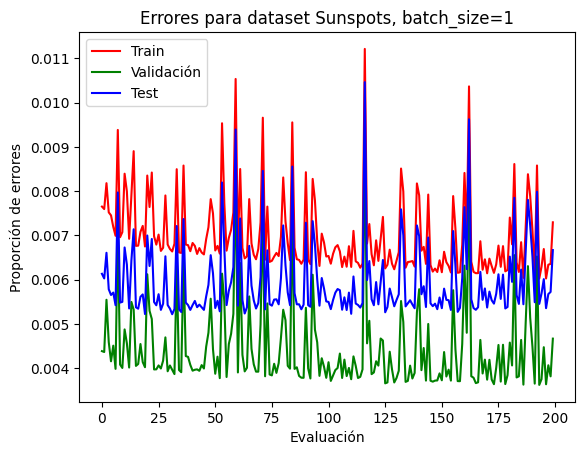

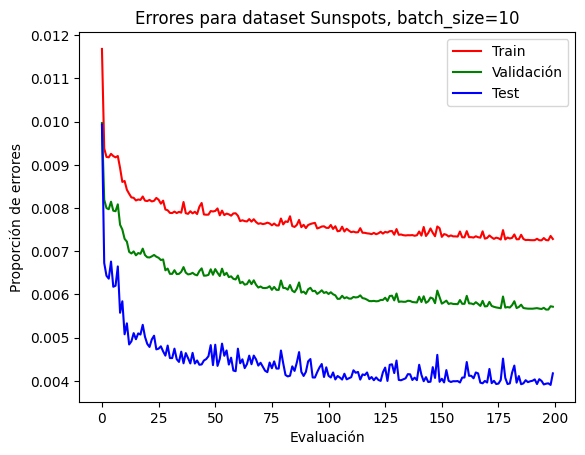

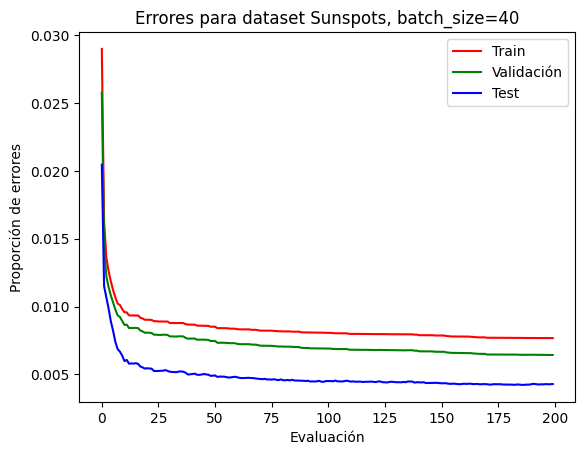

In [ ]:
# Batchsize 1
plt.plot(e_trains[0], color="red")
plt.plot(e_vals[0], color="green")
plt.plot(e_tests[0], color="blue")

plt.legend(["Train", "Validación", "Test"])
plt.title("Errores para dataset Sunspots, batch_size=1")
plt.xlabel("Evaluación")
plt.ylabel("Proporción de errores")
plt.show()

# Batchsize 10
plt.plot(e_trains[1], color="red")
plt.plot(e_tests[1], color="green")
plt.plot(e_vals[1], color="blue")
plt.legend(["Train", "Validación", "Test"])
plt.title("Errores para dataset Sunspots, batch_size=10")
plt.xlabel("Evaluación")
plt.ylabel("Proporción de errores")
plt.show()

# Batchsize 40
plt.plot(e_trains[2], color="red")
plt.plot(e_tests[2], color="green")
plt.plot(e_vals[2], color="blue")

plt.legend(["Train", "Validación", "Test"])
plt.title("Errores para dataset Sunspots, batch_size=40")
plt.xlabel("Evaluación")
plt.ylabel("Proporción de errores")
plt.show()

Podemos observar que, al aumentar el batch size, la convergencia se vuelve menos ruidosa.

Esto resulta de que, al tomar un batch de mayor tamaño, obtenemos un promedio para calcular el gradiente, lo cual naturalmente lo vuelve menos sensible a datos ruidosos.

Sin embargo, existen casos donde el performance de los modelos con baches más pequeños resulta superior.